In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, kstest, mannwhitneyu, ttest_ind, levene, kruskal
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Lab4.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# EDA

In [3]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
features = df.columns[1:]

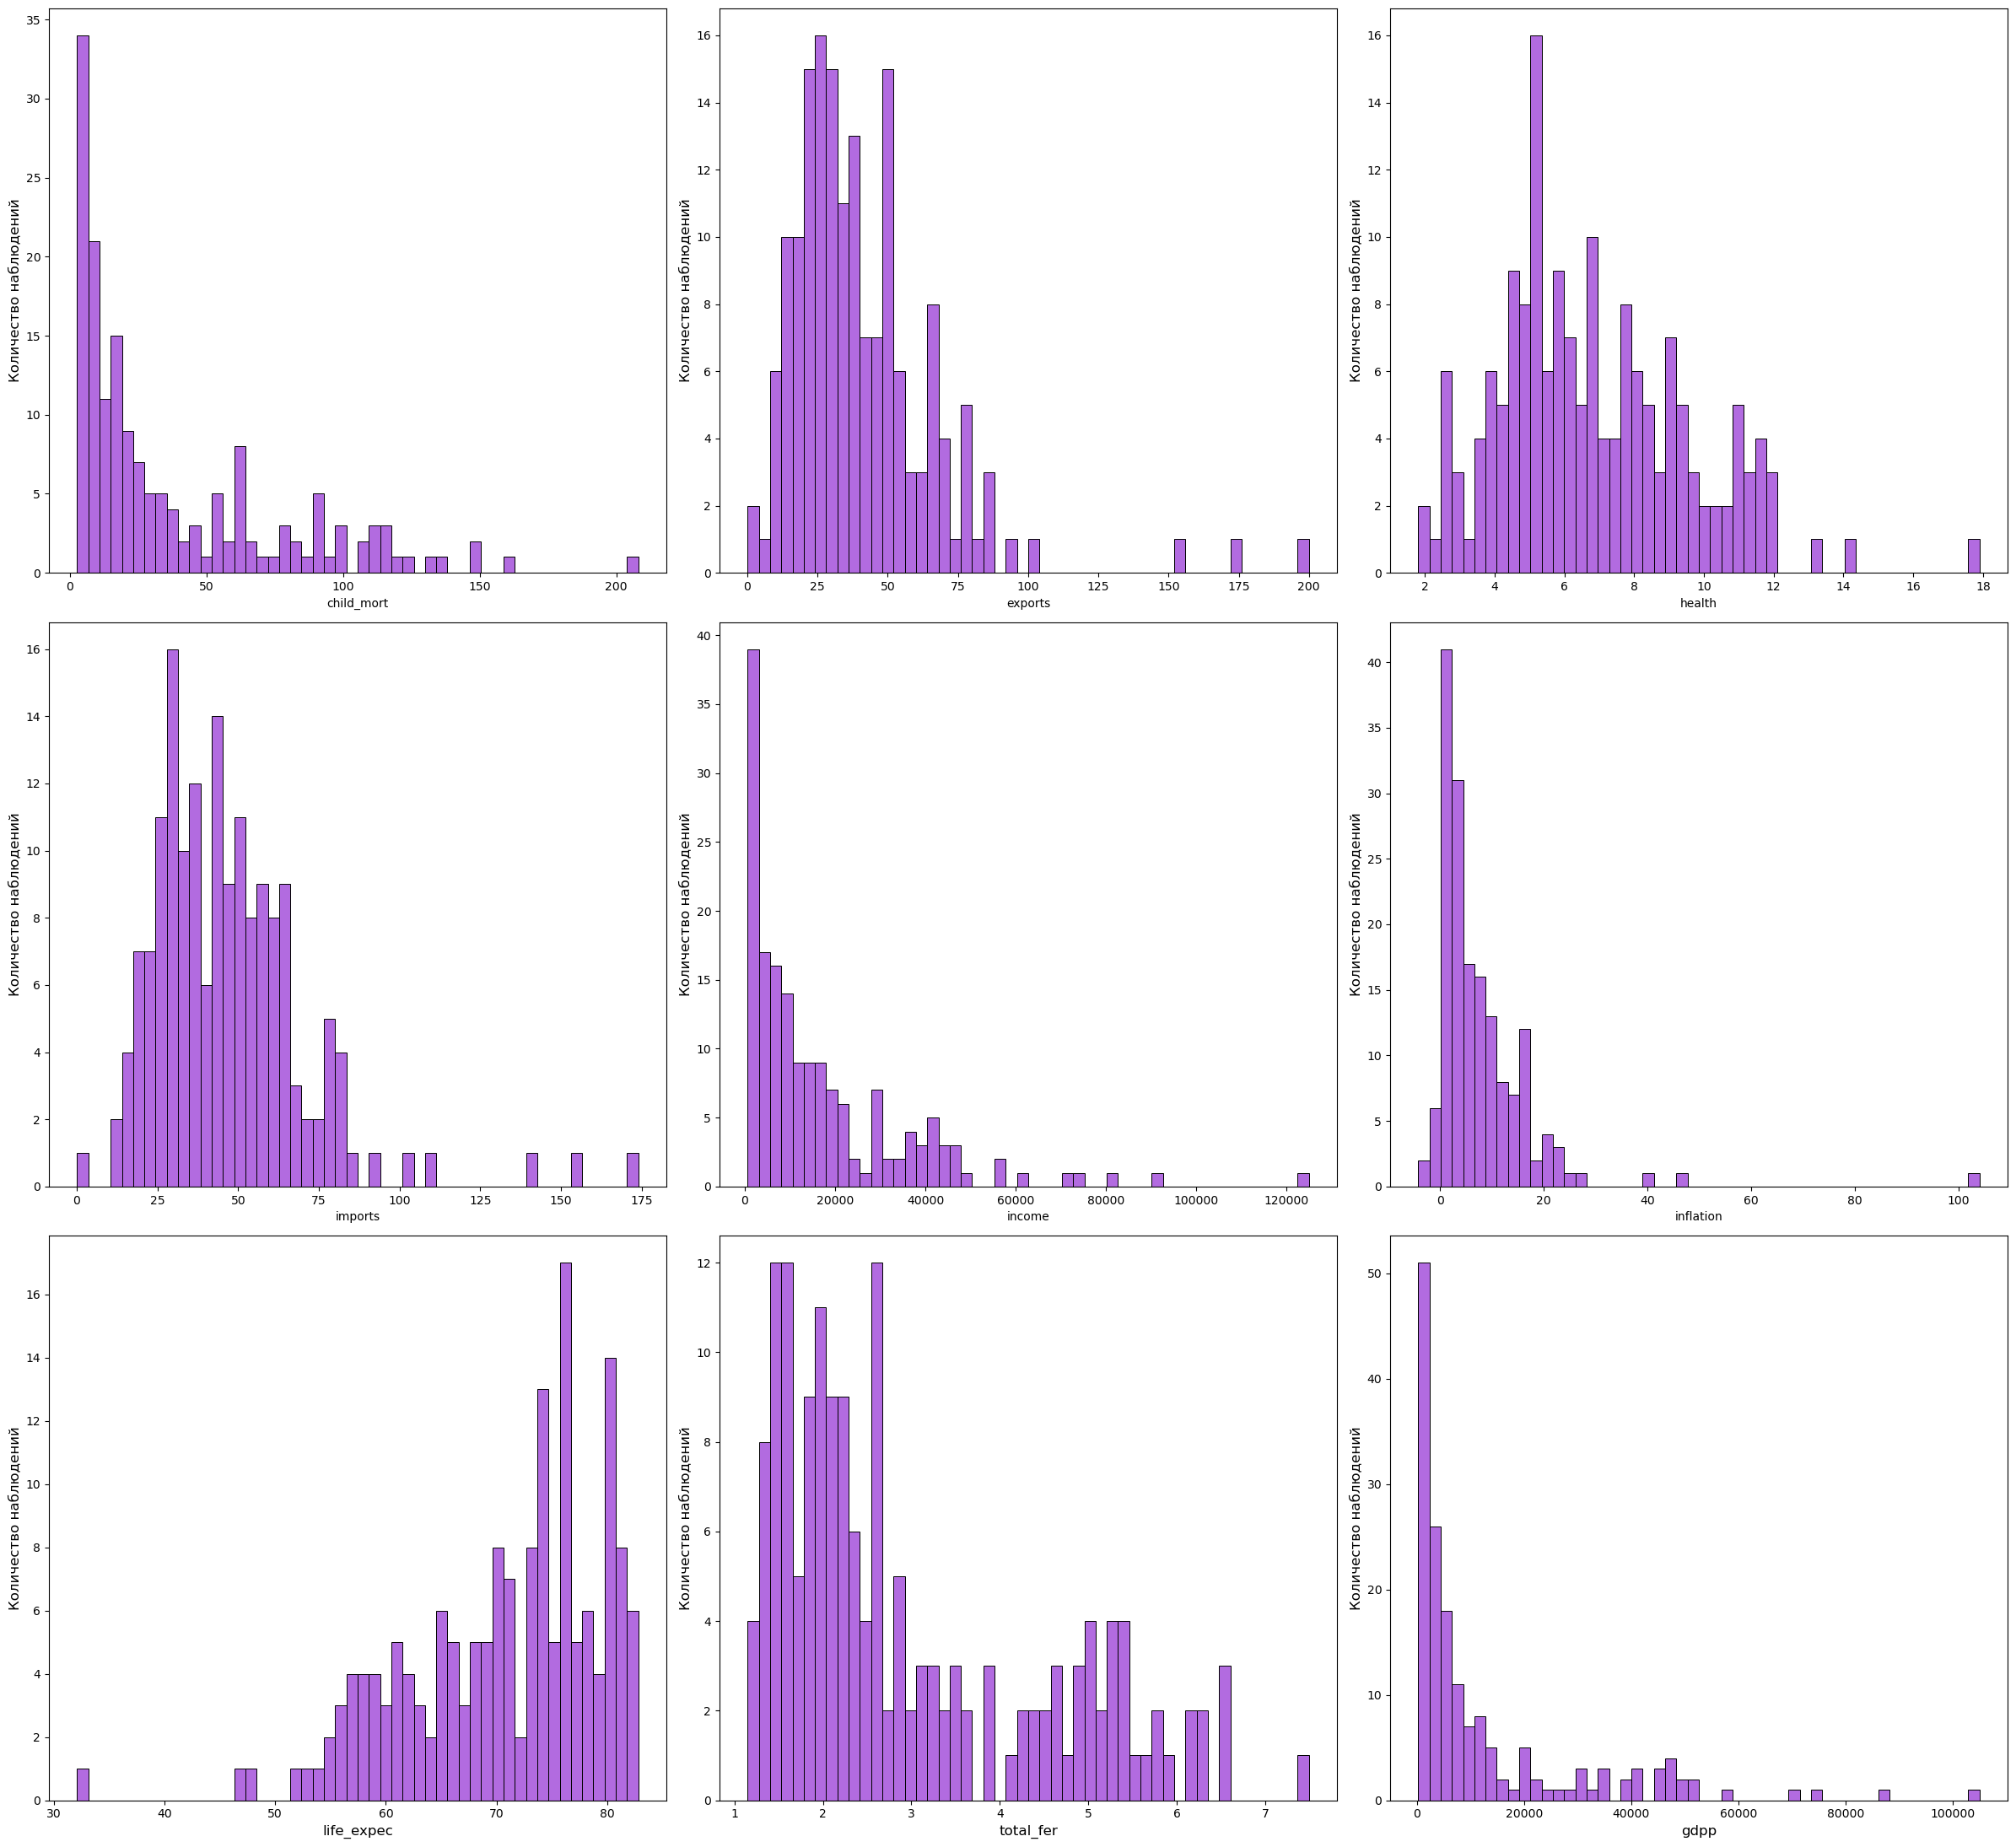

In [10]:
k = 0
m = 3
fig, axes = plt.subplots(m, m, figsize=(24, 22))

for i, ax in enumerate(axes.flat):
    if i >= len(features):
        break
    sns.histplot(ax=ax, data=df, x=features[i], color='#9939d6', bins = 50)
    ax.set_ylabel('Количество наблюдений', fontsize=12)
    if i >= m * (m - 1):
        ax.set_xlabel(features[i], fontsize=12)

plt.tight_layout()
plt.show()

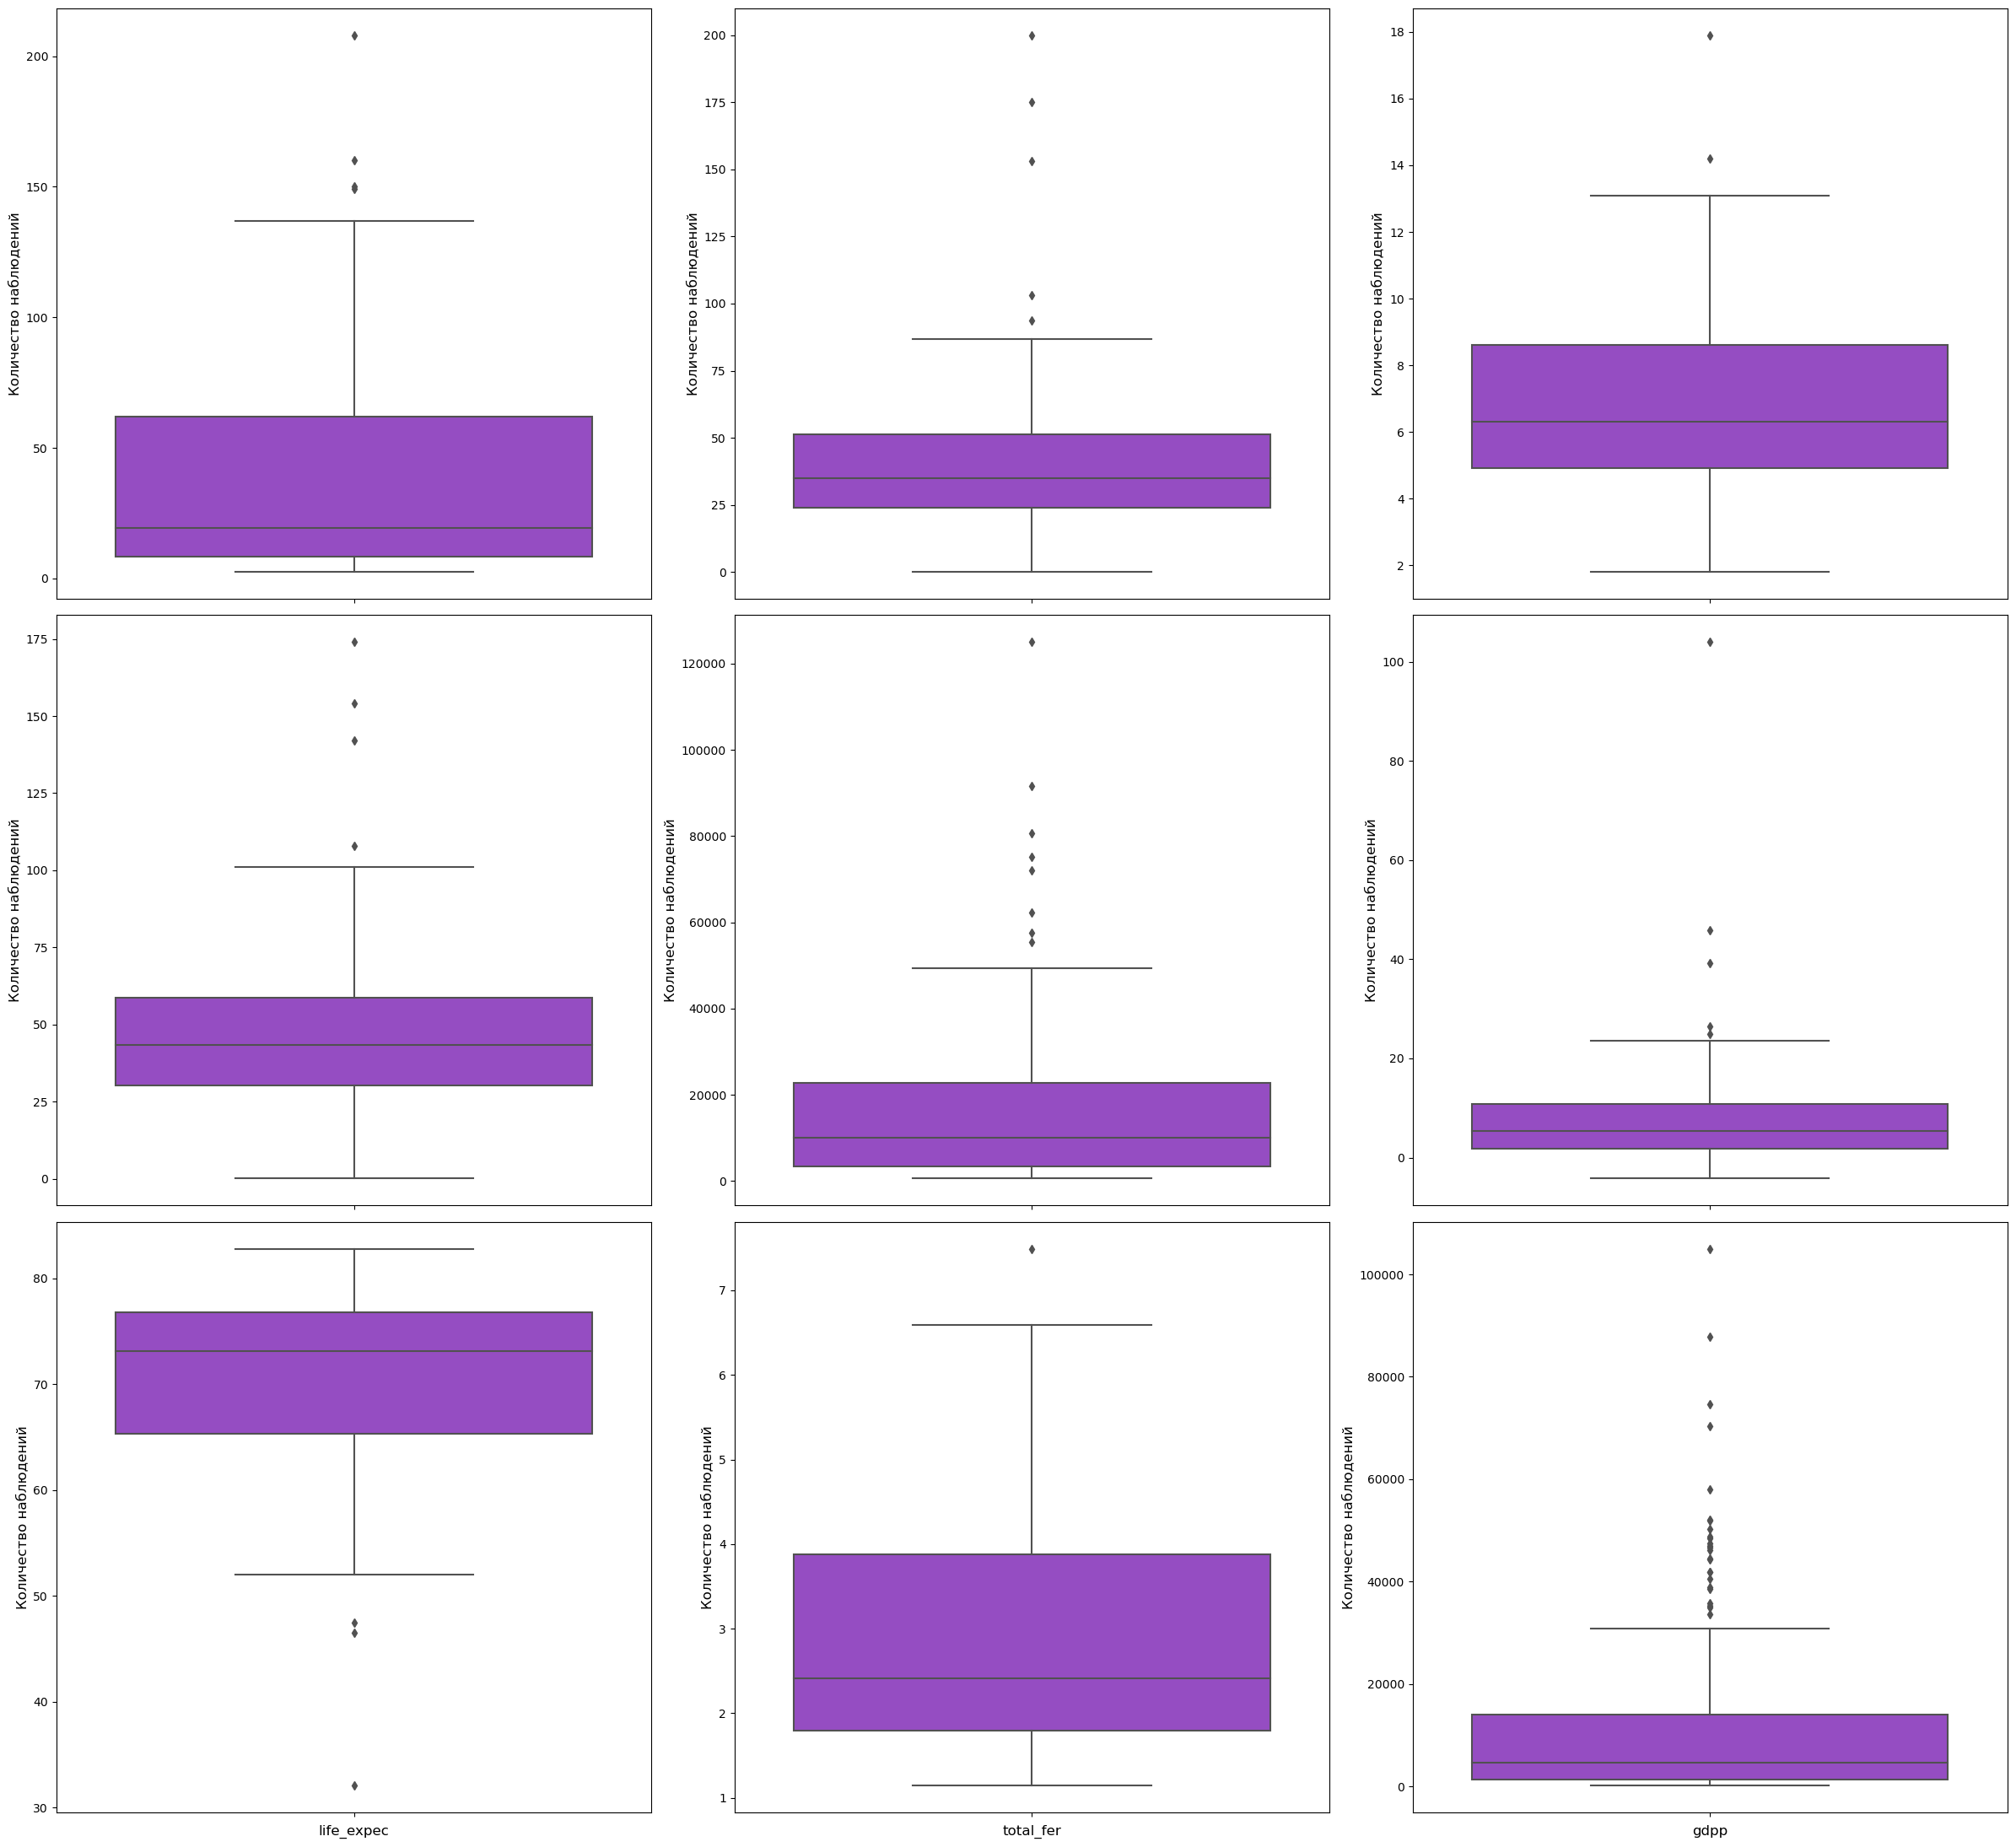

In [11]:
k = 0
m = 3
fig, axes = plt.subplots(m, m, figsize=(24, 22))

for i, ax in enumerate(axes.flat):
    if i >= len(features):
        break
    sns.boxplot(ax=ax, data=df, y=features[i], color='#9939d6')
    ax.set_ylabel('Количество наблюдений', fontsize=12)
    if i >= m * (m - 1):
        ax.set_xlabel(features[i], fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
def spearman_test(data_1, data_2):
    correlation = spearmanr(data_1, data_2)
    return '{0:.2f}\n{1:.2f}'.format(*correlation)

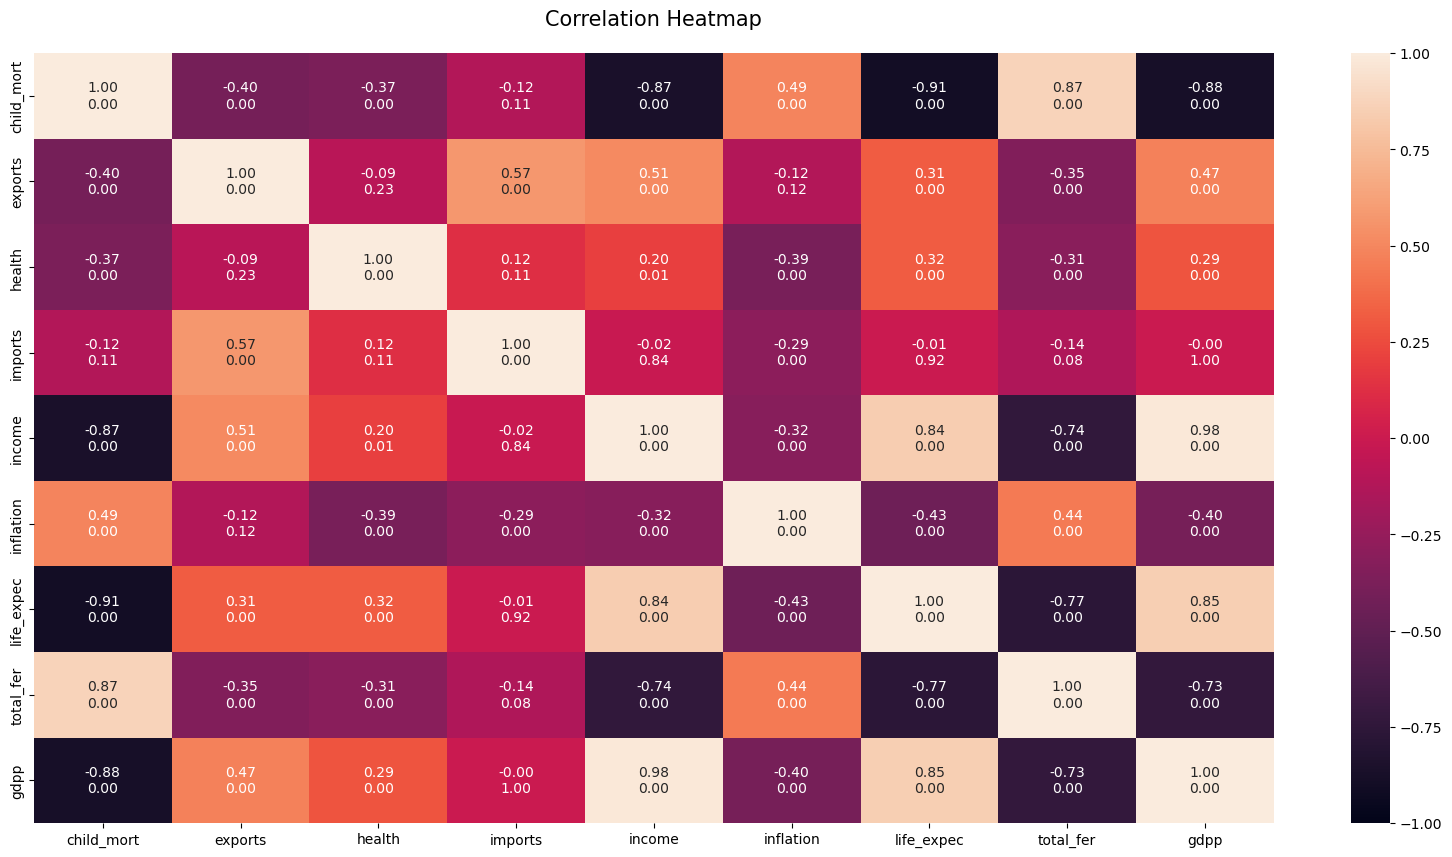

In [13]:
correlation = df[features].corr(method = 'spearman')
table = [[spearman_test(df[i], df[j]) for i in features] for j in features]
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=table, fmt='' )
heatmap.set_title('Correlation Heatmap', fontdict ={'fontsize':15}, pad=20);

Иза-за высокой интеркорреляции использовать признаки child_mort, income, life_expec, total_fer и gdpp нецелесообразно, достаточно выбрать один из них

**Признаки, которые точно идут в модель**:   
- exports
- health
- imports
- inflation

In [14]:
features

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [15]:
corr_features = ['child_mort', 'income', 'life_expec', 'total_fer', 'gdpp']

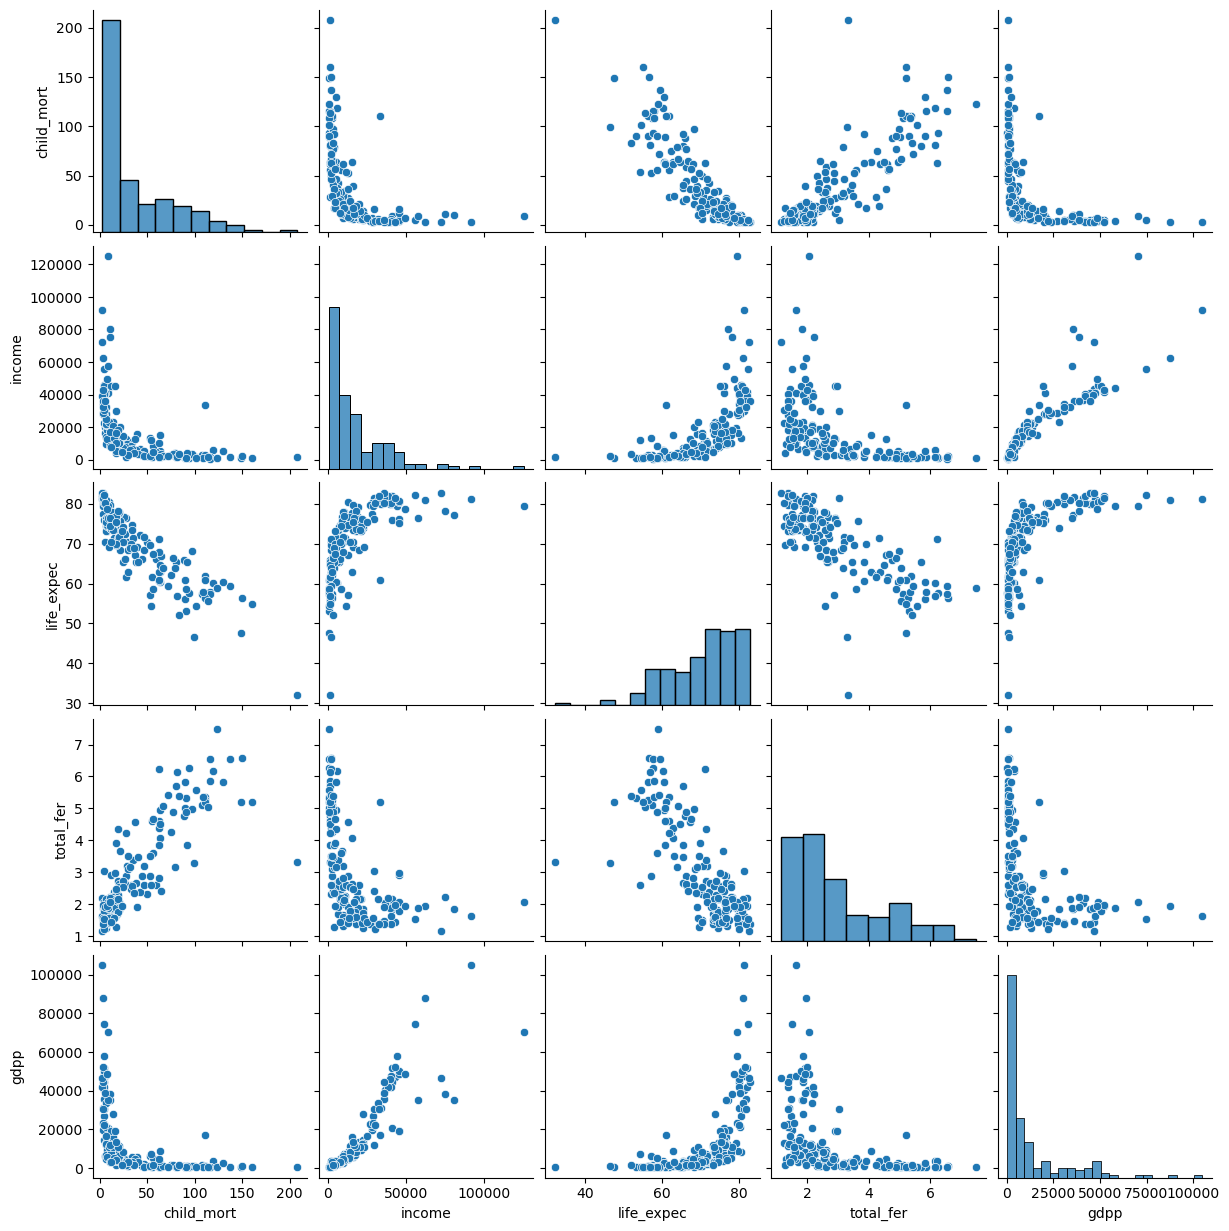

In [16]:
sns.pairplot(df[corr_features])